In [1]:
import os
import glob
import numpy as np
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split



**Understanding the Data Preparation Process**

This Python code snippet is designed to preprocess image data for a machine learning model

- **SIZE = 224**: This variable sets the size to which the images will be resized.

- **train_dir and test_dir**: These variables specify directories containing training and testing image data respectively.

- **real_images and forged_images**: These lists are designated to store grayscale images of real and forged signatures correspondingly.

- **Image Iteration**: The code iterates through each subdirectory in the training directory (`train_dir`). For each image, it reads the data, converts it to grayscale using the 'L' mode, resizes it to the specified size, and then appends it to either `real_images` or `forged_images` based on the last character of the subdirectory name ('r' for real, 'g' for forged).

- **np.array() Usage**: NumPy's `np.array()` function is employed to convert the image lists into NumPy arrays for further processing.

- **Label Creation**: The `real_labels` and `forged_labels` arrays are created to store labels for real and forged images, respectively. Real images are assigned a label of 0, while forged images are assigned a label of 1.

- **Data and Label Concatenation**: The `images` and `labels` arrays are formed by concatenating the real and forged images along with their corresponding labels.

- **Reshaping for Model Input**: The `images` array is reshaped to ensure it is suitable for feeding into a machine learning model.

- **Data Splitting**: The `train_test_split()` function is utilized to split the data into training and testing sets for model evaluation.




In [4]:
from sklearn.preprocessing import StandardScaler

SIZE = 224


train_dir = "signature_data/data"

real_images = []
forged_images = []

for per in os.listdir(train_dir):
    for data in glob.glob(os.path.join(train_dir, per, '*.*')):
        img = Image.open(data).convert('L')  # Convert to grayscale
        img = np.array(img)
        img = cv2.resize(img, (SIZE, SIZE))
        if per[-1] == 'g':
            forged_images.append(img)
        else:
            real_images.append(img)

real_images = np.array(real_images)
forged_images = np.array(forged_images)
real_labels = np.zeros((real_images.shape[0], 1))
forged_labels = np.ones((forged_images.shape[0], 1))
images = np.concatenate((real_images, forged_images))
labels = np.concatenate((real_labels, forged_labels))
images = images.reshape(images.shape[0], -1)

train_data, test_data, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

In below code snippet, we are performing the following steps:


1. **Scaling Data**: Using `StandardScaler` to standardize the features.
2. **Training SVM**: Employing an SVM classifier with a polynomial kernel.
3. **Making Predictions**: Predicting on the test data.
4. **Evaluating Performance**: Calculating accuracy and generating a classification report.

The code trains a Support Vector Machine (SVM) classifier on scaled data and evaluates its performance on a test set. The output "Accuracy: 0.55" indicates the classifier's overall accuracy, which is approximately 55%.

The classification report breaks down the performance further:
- **Precision**: The percentage of correctly predicted instances among the predicted positives. For class 0, it's 55%, and for class 1, it's 50%.
- **Recall**: The percentage of correctly predicted instances among the actual positives. For class 0, it's 99%, and for class 1, it's only 1%.
- **F1-score**: The harmonic mean of precision and recall, providing a balance between the two. For class 0, it's 71%, and for class 1, it's only 1%.

In summary, while the model performs well for class 0, it struggles with class 1 due to low recall and F1-score.

In [5]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

svm_classifier = svm.SVC(kernel='poly')
svm_classifier.fit(train_data, train_labels.ravel())

y_pred = svm_classifier.predict(test_data)

accuracy = accuracy_score(test_labels, y_pred)
report = classification_report(test_labels, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.5515151515151515
Classification Report:
               precision    recall  f1-score   support

         0.0       0.55      0.99      0.71       182
         1.0       0.50      0.01      0.01       148

    accuracy                           0.55       330
   macro avg       0.53      0.50      0.36       330
weighted avg       0.53      0.55      0.40       330



In this code segment, we're:

1. **Extracting HOG Features**: Using the Histogram of Oriented Gradients (HOG) method to extract features from images. HOG is a feature descriptor that captures the distribution of gradient orientations in an image.
2. **Preprocessing and Splitting Data**: Scaling the extracted HOG features and splitting them into training and testing sets.
3. **Training SVM on HOG Features**: Training a Support Vector Machine (SVM) classifier with a sigmoid kernel on the scaled HOG features.
4. **Evaluating Performance**: Making predictions on the test data and computing the accuracy and classification report.

The output "Accuracy on HOG Features: 0.7575757575757576" indicates the accuracy of the classifier using HOG features, which is approximately 75.76%.

In summary, the classifier using HOG features achieves a decent accuracy of 75.76%. It performs reasonably well in distinguishing between the two classes, with precision, recall, and F1-score values indicating balanced performance across the classes.

In [6]:
from skimage.feature import hog
from sklearn.preprocessing import StandardScaler

def compute_hog_features(img):
    features, _ = hog(img, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True)
    return features

hog_real_images = np.array([compute_hog_features(img) for img in real_images])
hog_forged_images = np.array([compute_hog_features(img) for img in forged_images])

hog_features = np.concatenate((hog_real_images, hog_forged_images))
hog_features = hog_features.reshape(hog_features.shape[0], -1)

hog_train_data, hog_test_data, hog_train_labels, hog_test_labels = train_test_split(
    hog_features, labels, test_size=0.2, random_state=42
)

hog_scaler = StandardScaler()
hog_train_data = hog_scaler.fit_transform(hog_train_data)
hog_test_data = hog_scaler.transform(hog_test_data)
                      

hog_svm_classifier = svm.SVC(kernel='sigmoid')
hog_svm_classifier.fit(hog_train_data, hog_train_labels.ravel())
hog_y_pred = hog_svm_classifier.predict(hog_test_data)
hog_accuracy = accuracy_score(hog_test_labels, hog_y_pred)
hog_report = classification_report(hog_test_labels, hog_y_pred)

print("Accuracy on HOG Features:", hog_accuracy)
print("Classification Report on HOG Features:\n", hog_report)

Accuracy on HOG Features: 0.7575757575757576
Classification Report on HOG Features:
               precision    recall  f1-score   support

         0.0       0.80      0.75      0.77       182
         1.0       0.72      0.76      0.74       148

    accuracy                           0.76       330
   macro avg       0.76      0.76      0.76       330
weighted avg       0.76      0.76      0.76       330



The ROC curve visualizes a binary classifier's ability to distinguish between classes by plotting the true positive rate against the false positive rate across different threshold settings. It summarizes the trade-off between sensitivity (true positive rate) and specificity (true negative rate). A curve closer to the upper-left corner indicates better performance, with the area under the curve (AUC-ROC) quantifying the classifier's overall effectiveness.

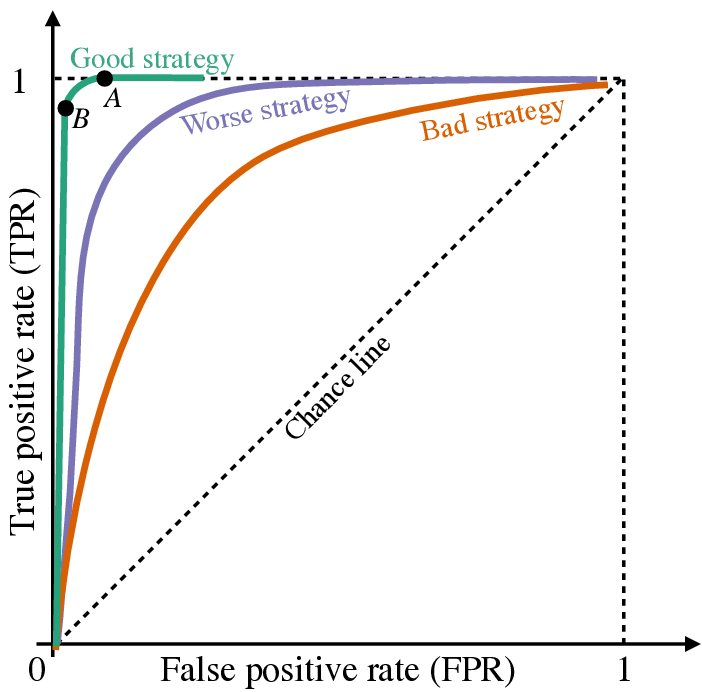

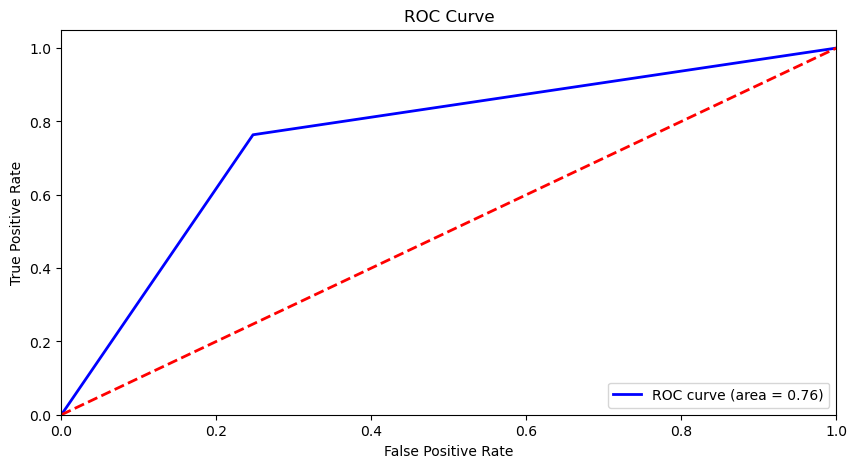

In [7]:
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns


# Plot ROC curve
plt.figure(figsize=(10, 5))
fpr, tpr, thresholds = roc_curve(hog_test_labels, hog_y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


In this Jupiter cell:

We initially train an SVM classifier with a sigmoid kernel using the HOG features and evaluate its performance.
Subsequently, we conduct a grid search to identify the optimal hyperparameters for an SVM classifier with a polynomial kernel.
With the best hyperparameters obtained from the grid search, we train another SVM classifier with a polynomial kernel and assess its performance.
To visually compare the classifiers' ability to distinguish between classes, we plot their ROC curves, showcasing the trade-off between true positive and false positive rates.

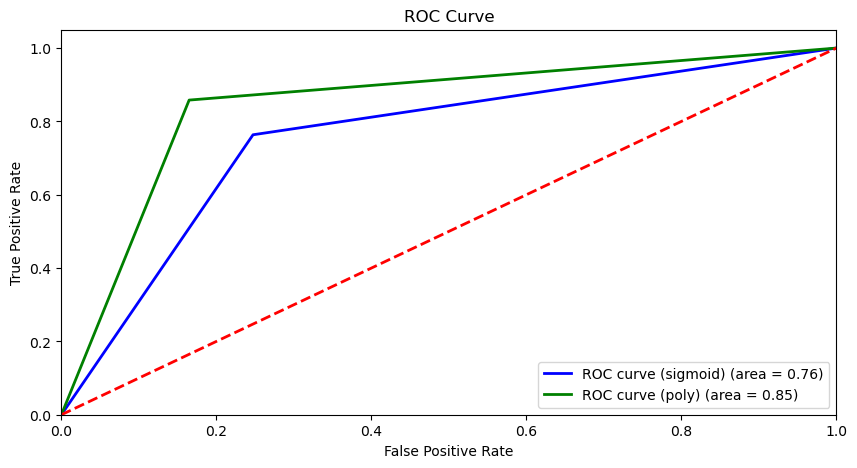

Best Parameters: {'C': 10, 'coef0': 0.1, 'degree': 2}
Accuracy on HOG Features (Sigmoid SVM): 0.7575757575757576
Classification Report on HOG Features (Sigmoid SVM):
               precision    recall  f1-score   support

         0.0       0.80      0.75      0.77       182
         1.0       0.72      0.76      0.74       148

    accuracy                           0.76       330
   macro avg       0.76      0.76      0.76       330
weighted avg       0.76      0.76      0.76       330

Accuracy on HOG Features (Poly SVM): 0.8454545454545455
Classification Report on HOG Features (Poly SVM):
               precision    recall  f1-score   support

         0.0       0.88      0.84      0.86       182
         1.0       0.81      0.86      0.83       148

    accuracy                           0.85       330
   macro avg       0.84      0.85      0.84       330
weighted avg       0.85      0.85      0.85       330



In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

hog_svm_classifier = svm.SVC(kernel='sigmoid')
hog_svm_classifier.fit(hog_train_data, hog_train_labels.ravel())

hog_y_pred_sigmoid = hog_svm_classifier.predict(hog_test_data)

hog_accuracy_sigmoid = accuracy_score(hog_test_labels, hog_y_pred_sigmoid)
hog_report_sigmoid = classification_report(hog_test_labels, hog_y_pred_sigmoid)

svm_classifier = svm.SVC(kernel='poly')
param_grid = {'C': [0.1, 1, 10], 'degree': [2, 3, 4], 'coef0': [0.0, 0.1, 1.0]}
grid_search = GridSearchCV(svm_classifier, param_grid, cv=3)
grid_search.fit(hog_train_data, hog_train_labels.ravel())
best_params = grid_search.best_params_

best_svm_classifier = svm.SVC(kernel='poly', C=best_params['C'], degree=best_params['degree'], coef0=best_params['coef0'])
best_svm_classifier.fit(hog_train_data, hog_train_labels.ravel())

hog_y_pred_poly = best_svm_classifier.predict(hog_test_data)

hog_accuracy_poly = accuracy_score(hog_test_labels, hog_y_pred_poly)
hog_report_poly = classification_report(hog_test_labels, hog_y_pred_poly)

plt.figure(figsize=(10, 5))
fpr_sigmoid, tpr_sigmoid, _ = roc_curve(hog_test_labels, hog_y_pred_sigmoid)
roc_auc_sigmoid = auc(fpr_sigmoid, tpr_sigmoid)
plt.plot(fpr_sigmoid, tpr_sigmoid, color='blue', lw=2, label='ROC curve (sigmoid) (area = %0.2f)' % roc_auc_sigmoid)

fpr_poly, tpr_poly, _ = roc_curve(hog_test_labels, hog_y_pred_poly)
roc_auc_poly = auc(fpr_poly, tpr_poly)
plt.plot(fpr_poly, tpr_poly, color='green', lw=2, label='ROC curve (poly) (area = %0.2f)' % roc_auc_poly)

plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print("Best Parameters:", best_params)
print("Accuracy on HOG Features (Sigmoid SVM):", hog_accuracy_sigmoid)
print("Classification Report on HOG Features (Sigmoid SVM):\n", hog_report_sigmoid)
print("Accuracy on HOG Features (Poly SVM):", hog_accuracy_poly)
print("Classification Report on HOG Features (Poly SVM):\n", hog_report_poly)


In [9]:
print("Best Parameters:", best_params)


Best Parameters: {'C': 10, 'coef0': 0.1, 'degree': 2}


Train a Random Forest classifier with 100 estimators using the HOG features.
Predict labels for the test data using the trained Random Forest classifier.
Compute the accuracy and classification report for the Random Forest classifier on the HOG features.

In [10]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier_hog = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_hog.fit(hog_train_data, hog_train_labels.ravel())
rf_y_pred_hog = rf_classifier_hog.predict(hog_test_data)

rf_accuracy_hog = accuracy_score(hog_test_labels, rf_y_pred_hog)
rf_report_hog = classification_report(hog_test_labels, rf_y_pred_hog)

print("Accuracy with Random Forest on HOG:", rf_accuracy_hog)
print("Classification Report with Random Forest on HOG:\n", rf_report_hog)

Accuracy with Random Forest on HOG: 0.7212121212121212
Classification Report with Random Forest on HOG:
               precision    recall  f1-score   support

         0.0       0.75      0.74      0.74       182
         1.0       0.68      0.70      0.69       148

    accuracy                           0.72       330
   macro avg       0.72      0.72      0.72       330
weighted avg       0.72      0.72      0.72       330



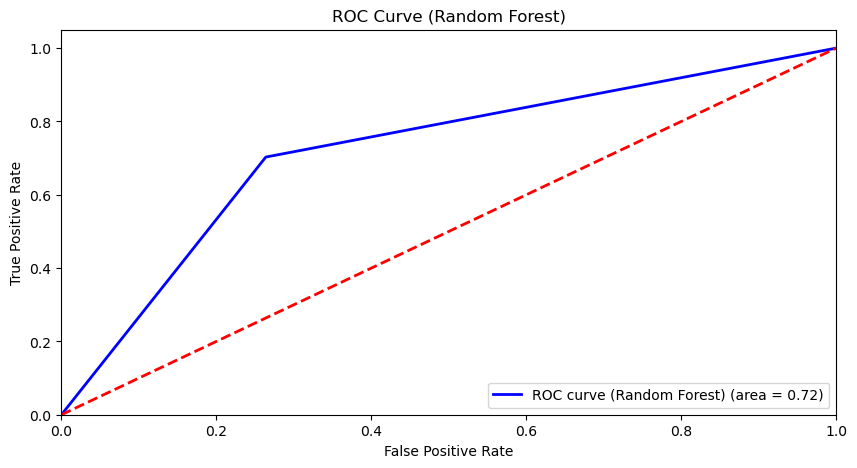

In [11]:
# Plot ROC curve for Random Forest classifier
plt.figure(figsize=(10, 5))
fpr_rf, tpr_rf, _ = roc_curve(hog_test_labels, rf_y_pred_hog)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='ROC curve (Random Forest) (area = %0.2f)' % roc_auc_rf)

plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Random Forest)')
plt.legend(loc="lower right")
plt.show()


In this code snippet, we employ a Polynomial Support Vector Machine (SVM) classifier to analyze edge features extracted using the Canny edge detection algorithm. Here's a breakdown of the process:

1. **Edge Feature Extraction**: We define a function `compute_edge_features` to extract edge features from images using the Canny edge detection algorithm.

2. **Feature Generation**: The `compute_edge_features` function is applied to both real and forged images separately, generating edge features for each image.

3. **Data Preparation**: The extracted edge features are split into training and testing sets using `train_test_split`. The training data is then scaled using `StandardScaler` to standardize the feature values.

4. **SVM Classifier Training**: We instantiate an SVM classifier with a polynomial kernel (`kernel='poly'`) and fit it to the scaled edge features.

5. **Prediction and Evaluation**: The trained SVM classifier is used to predict labels for the test data. We compute the accuracy and classification report to evaluate the classifier's performance on the edge features.


In [12]:
from skimage.feature import canny
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

def compute_edge_features(img):
    edges = canny(img)
    return edges.flatten()

edge_real_images = np.array([compute_edge_features(img) for img in real_images])
edge_forged_images = np.array([compute_edge_features(img) for img in forged_images])

edge_features = np.concatenate((edge_real_images, edge_forged_images))
edge_features = edge_features.reshape(edge_features.shape[0], -1)

edge_train_data, edge_test_data, edge_train_labels, edge_test_labels = train_test_split(
    edge_features, labels, test_size=0.2, random_state=42
)
edge_scaler = StandardScaler()
edge_train_data = edge_scaler.fit_transform(edge_train_data)
edge_test_data = edge_scaler.transform(edge_test_data)

svm_classifier_edge = SVC(kernel='poly')
svm_classifier_edge.fit(edge_train_data, edge_train_labels.ravel())

svm_y_pred_edge = svm_classifier_edge.predict(edge_test_data)

svm_accuracy_edge = accuracy_score(edge_test_labels, svm_y_pred_edge)
svm_report_edge = classification_report(edge_test_labels, svm_y_pred_edge)

print("Accuracy with Polynomial SVM on Edge Features:", svm_accuracy_edge)
print("Classification Report with Polynomial SVM on Edge Features:\n", svm_report_edge)

Accuracy with Polynomial SVM on Edge Features: 0.5515151515151515
Classification Report with Polynomial SVM on Edge Features:
               precision    recall  f1-score   support

         0.0       0.55      1.00      0.71       182
         1.0       0.00      0.00      0.00       148

    accuracy                           0.55       330
   macro avg       0.28      0.50      0.36       330
weighted avg       0.30      0.55      0.39       330



/home/marine/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/marine/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/marine/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


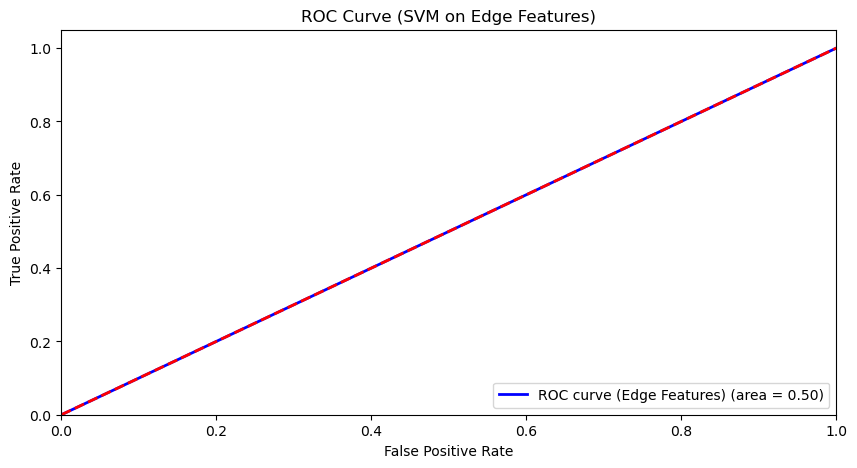

In [13]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Plot ROC curve for SVM classifier on edge features
plt.figure(figsize=(10, 5))
fpr_edge, tpr_edge, _ = roc_curve(edge_test_labels, svm_y_pred_edge)
roc_auc_edge = auc(fpr_edge, tpr_edge)
plt.plot(fpr_edge, tpr_edge, color='blue', lw=2, label='ROC curve (Edge Features) (area = %0.2f)' % roc_auc_edge)

plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (SVM on Edge Features)')
plt.legend(loc="lower right")
plt.show()

In this code snippet, we utilize the k-Nearest Neighbors (k-NN) classifier to analyze Histogram of Oriented Gradient (HOG) features extracted from image data. Here's a breakdown of the process:

1. **Classifier Initialization**: We initialize a k-NN classifier with `n_neighbors=3`, specifying the number of neighbors to consider when making predictions.

2. **Training**: The k-NN classifier is trained using the training data (`hog_train_data`) and their corresponding labels (`hog_train_labels`).

3. **Prediction**: We predict labels for the test data (`hog_test_data`) using the trained k-NN classifier.

4. **Evaluation**: The accuracy and classification report are computed to evaluate the performance of the k-NN classifier on the HOG features.


In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from skimage.feature import hog
from sklearn.preprocessing import StandardScaler

knn_classifier = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors (k)
knn_classifier.fit(hog_train_data, hog_train_labels.ravel())
hog_y_pred_knn = knn_classifier.predict(hog_test_data)
knn_accuracy = accuracy_score(hog_test_labels, hog_y_pred_knn)
knn_report = classification_report(hog_test_labels, hog_y_pred_knn)

print("Accuracy of k-NN Classifier:", knn_accuracy)
print("Classification Report of k-NN Classifier:\n", knn_report)

Accuracy of k-NN Classifier: 0.8121212121212121
Classification Report of k-NN Classifier:
               precision    recall  f1-score   support

         0.0       0.83      0.83      0.83       182
         1.0       0.79      0.79      0.79       148

    accuracy                           0.81       330
   macro avg       0.81      0.81      0.81       330
weighted avg       0.81      0.81      0.81       330



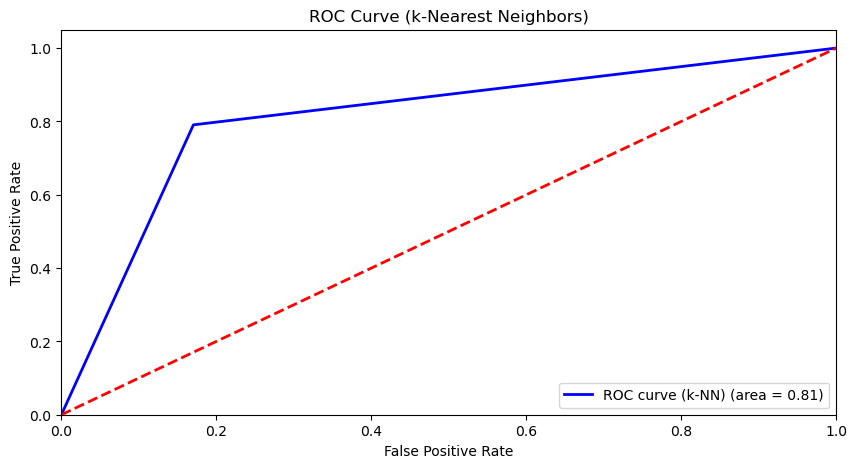

In [15]:

fpr_knn, tpr_knn, _ = roc_curve(hog_test_labels, hog_y_pred_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot ROC curve
plt.figure(figsize=(10, 5))
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label='ROC curve (k-NN) (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (k-Nearest Neighbors)')
plt.legend(loc="lower right")
plt.show()


In this code snippet, we create an ensemble classifier using the Voting Classifier from scikit-learn. Here's a breakdown of what each part does:

1. **Individual Classifiers**: We create two individual classifiers, namely K-Nearest Neighbors (KNN) classifier and Support Vector Machine (SVM) classifier with a polynomial kernel.

2. **Voting Classifier**: We create a Voting Classifier, an ensemble method that combines the predictions from multiple individual classifiers. In this case, we use the 'soft' voting strategy, where the predicted probabilities for each class are averaged across all classifiers.

3. **Training**: We train the ensemble classifier on the HOG features of the training data.

4. **Prediction**: We make predictions on the HOG features of the test data using the trained ensemble classifier.




In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=3)
poly_svm_classifier = svm.SVC(kernel='poly', C=10, degree=2, coef0=0.1, probability=True)

voting_classifier = VotingClassifier(
    estimators=[
        ('knn', knn_classifier),
        ('poly_svm', poly_svm_classifier),
    ],
    voting='soft'
)

voting_classifier.fit(hog_train_data, hog_train_labels.ravel())
hog_y_pred_voting = voting_classifier.predict(hog_test_data)

voting_accuracy = accuracy_score(hog_test_labels, hog_y_pred_voting)
voting_report = classification_report(hog_test_labels, hog_y_pred_voting)

print("Accuracy of Voting Classifier:", voting_accuracy)
print("Classification Report of Voting Classifier:\n", voting_report)

Accuracy of Voting Classifier: 0.8818181818181818
Classification Report of Voting Classifier:
               precision    recall  f1-score   support

         0.0       0.91      0.87      0.89       182
         1.0       0.85      0.89      0.87       148

    accuracy                           0.88       330
   macro avg       0.88      0.88      0.88       330
weighted avg       0.88      0.88      0.88       330



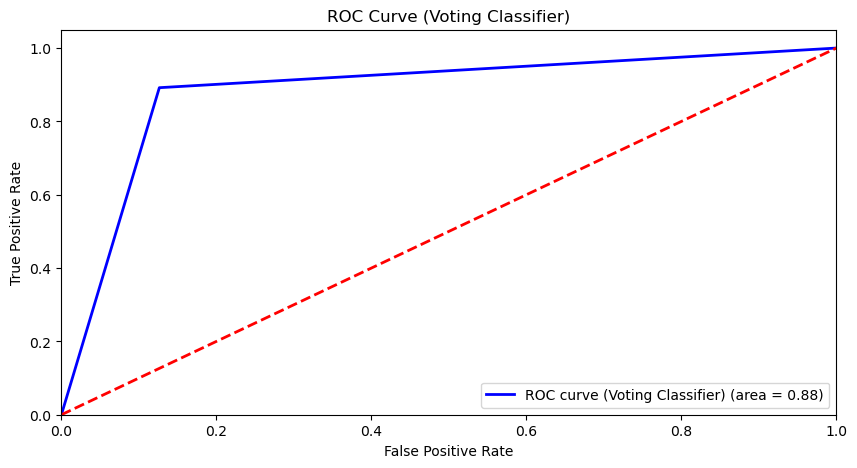

In [17]:
fpr_voting, tpr_voting, _ = roc_curve(hog_test_labels, hog_y_pred_voting)
roc_auc_voting = auc(fpr_voting, tpr_voting)

# Plot ROC curve
plt.figure(figsize=(10, 5))
plt.plot(fpr_voting, tpr_voting, color='blue', lw=2, label='ROC curve (Voting Classifier) (area = %0.2f)' % roc_auc_voting)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Voting Classifier)')
plt.legend(loc="lower right")
plt.show()

In [18]:
import joblib

joblib.dump(voting_classifier, 'voting_classifier_model.pkl')


['voting_classifier_model.pkl']

In [19]:
loaded_model = joblib.load('voting_classifier_model.pkl')
hog_y_pred_loaded = loaded_model.predict(hog_test_data)

loaded_accuracy = accuracy_score(hog_test_labels, hog_y_pred_loaded)
loaded_report = classification_report(hog_test_labels, hog_y_pred_loaded)

print("Accuracy of Loaded Model:", loaded_accuracy)
print("Classification Report of Loaded Model:\n", loaded_report)


Accuracy of Loaded Model: 0.8818181818181818
Classification Report of Loaded Model:
               precision    recall  f1-score   support

         0.0       0.91      0.87      0.89       182
         1.0       0.85      0.89      0.87       148

    accuracy                           0.88       330
   macro avg       0.88      0.88      0.88       330
weighted avg       0.88      0.88      0.88       330

